# **Análise das Tendências Diárias no Youtube** 

## 1. Introdução

O Youtube é a plataforma de compartilhamento de vídeos online mais famosa e uma das mais rentáveis do mundo atualmente, com cerca de 2.000.000.000 de usuários (Outubro/2020) e um income registrado em 2019 de $15.000.000.000,00. Ele mantém uma lista dos vídeos com maior tendência de serem visualizados, usando uma combinação de diversos fatores, incluindo medidas relacinadas a interações do usuários com os vídeos, como número de views, likes, comentários e compartilhamentos. 

Procurando aprofundar nas características desses vídeos e também na época em que se tornaram "trending", vamos construir um relatório que nos permita responder 4 principais perguntas:

- Qual é o tipo de conteúdo que mais viraliza?
- Qual a correlação entre visualização e likes?
- É possível inferir assuntos do momento com base nos vídeos famosos?
- Quais tópicos são mais abordados em cada país?

Com métodos estatísticos aliados à linguagem de programação Python e ao Google Colab, produziremos uma análise minusciosa dos componentes presentes no dataset e das relações entre as variáveis que se escondem atrás dos dados apresentados aos leitores desse relatório.

## 2. Conhecendo a Base

Este dataset ***Trending YouTube Video Statistics*** é um registro diário dos vídeos mais populares do YouTube. Inclui vários meses (e contando) de dados sobre tendências diárias de vídeos do YouTube. Os dados estão incluídos para as regiões dos EUA, GB, DE, CA, FR, MX, KR, JP IN (EUA, Grã-Bretanha, Alemanha, Canadá, França, México, Coreia do Sul, Japão e Índia, respectivamente), com até 200 vídeos populares listados por dia.

\* Este conjunto de dados foi coletado usando a API do YouTube.


## 3. Análise Exploratória dos Dados

In [1]:
# Importando os módulos necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import string
!pip install fonttools wordcloud
from wordcloud import WordCloud, STOPWORDS
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode
import scipy

In [2]:
# Definindo o estilo dos gráficos

plt.style.use('seaborn')

plt.rcParams['figure.figsize']  = (12, 8)
plt.rcParams['axes.labelsize']  = 15
plt.rcParams['axes.titlesize']  = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.ion()

In [3]:
#lendo os arquivos

paises = ['BR','CA','DE','FR','GB','IN','JP','KR','MX','US']
dfs = []
for i in paises:
    df = pd.read_csv(f'{i}_youtube_trending_data.csv', sep=',')
    dfs.append(df)

In [4]:
df_usa = dfs[-1]

In [5]:
usvideos = df_usa
usvideos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


Sobre cada coluna do nosso dataset:
 
- *video_id* - ID do vídeo
- *trending_date* - Data em  que se tornou "trending"
- *title* - Título do vídeo
- *channel_title* - Nome do canal responsável pela postagemdo vídeo
- *category_id* - ID referente à categoria do vídeo (**olhar próxima seção**)
- *publish_time* - Data de publicação com horário e timezone
- *tags* - Tags referentes aos assuntos tratados no vídeo postado
- *views* - Número de visualiações
- *likes* - Número de curtidas
- *dislikes* - Número de dislikes
- *thumbnail_link* - Link com a imagem de thumbnail
- *comments_disabled* - Informação se comentários foram desabilitados (True/False)
- *ratings_disabled* - Informação se classifcação foi desabilitada (True/False)
- *video_error_or_removed* - Informação se vídeo foi removido ou obteve erro (True/False)
- *description* - Descrição do vídeo


### Category Id from YT

> 1 - Film & Animation

> 2 - Cars & Vehicles

> 10 - Music

> 15 - Pets & Animals

> 17 - Sport

> 19 - Travel & Events

> 20 - Gaming

> 22 - People & Blogs

> 23 - Comedy

> 24 - Entertainment

> 25 - News & Politics

> 26 - How-to & Style

> 27 - Education

> 28 - Science & Technology

> 29 - Non-profits & Activism

[Fonte sobre categorias](https://gist.github.com/dgp/1b24bf2961521bd75d6c)

Retirando 3 colunas que não influenciam em nenhuma análise a ser feita:

In [6]:
usvideos.drop(columns=['video_id', 'thumbnail_link', 'video_id'], axis = 1, inplace=True)

Procurando facilitar a utilização da data na nossa análise:

In [7]:
usvideos['publishedAt'] = usvideos['publishedAt'].apply(lambda x: x[:10])
usvideos['publishedAt'] = pd.to_datetime(usvideos['publishedAt'], format="%Y-%m-%d")

print("Data mais antiga:", min(usvideos['publishedAt']))
print("\nData mais recente:", max(usvideos['publishedAt']))



Data mais antiga: 2020-08-03 00:00:00

Data mais recente: 2021-04-18 00:00:00


In [8]:
categories = usvideos.groupby('categoryId')

for name,group in categories:
    print("Categoria:", name)
    print()
    print(group[['view_count', 'likes', 'dislikes']].describe())
    print('\n')
    [print("#", end='') for i in range(70)]
    print()

Categoria: 1

         view_count          likes      dislikes
count  1.904000e+03    1904.000000   1904.000000
mean   2.052134e+06  102098.188550   1831.032038
std    2.433457e+06  114469.942995   2608.049208
min    6.441800e+04       0.000000      0.000000
25%    5.876462e+05   33342.500000    429.000000
50%    1.162478e+06   70968.000000    904.000000
75%    2.363322e+06  128992.750000   2051.500000
max    1.721235e+07  961910.000000  23654.000000


######################################################################
Categoria: 2

         view_count         likes      dislikes
count  9.180000e+02  9.180000e+02    918.000000
mean   1.177891e+06  4.555443e+04    812.327887
std    1.951357e+06  1.052336e+05   1006.638911
min    7.698700e+04  0.000000e+00      0.000000
25%    3.877595e+05  1.286175e+04    266.000000
50%    7.213615e+05  2.947850e+04    544.000000
75%    1.290779e+06  5.044150e+04    978.750000
max    3.570888e+07  1.368171e+06  18047.000000


########################

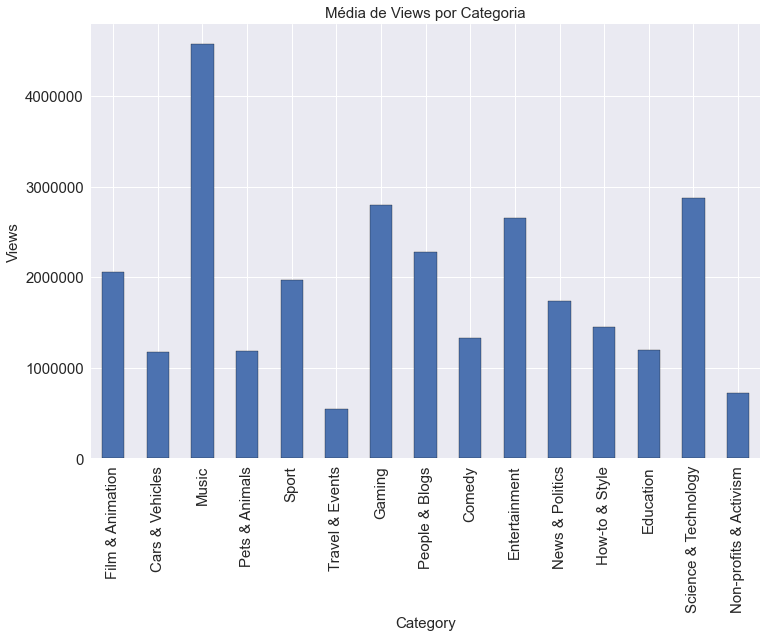

In [9]:
views_per_category = categories['view_count'].agg(np.mean).round(0)

views_per_category.set_axis(['Film & Animation','Cars & Vehicles','Music','Pets & Animals','Sport','Travel & Events','Gaming','People & Blogs','Comedy','Entertainment','News & Politics','How-to & Style','Education','Science & Technology','Non-profits & Activism'], inplace=True)


views_per_category.plot(kind='bar', title="Média de Views por Categoria", xlabel="Category", ylabel="Views", edgecolor='k')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [10]:
likes_dislikes = categories[['likes', 'dislikes']].agg(np.mean).round(0)
likes_dislikes

,likes,dislikes
categoryId,,
1,102098.0,1831.0
2,45554.0,812.0
10,310573.0,6877.0
15,54835.0,781.0
17,41929.0,1377.0
19,23663.0,633.0
20,147011.0,3006.0
22,134762.0,4359.0
23,103388.0,1349.0


In [11]:
likes_dislikes.set_axis(['Film & Animation','Cars & Vehicles','Music','Pets & Animals','Sport','Travel & Events','Gaming','People & Blogs','Comedy','Entertainment','News & Politics','How-to & Style','Education','Science & Technology','Non-profits & Activism'], inplace=True)
likes_dislikes

,likes,dislikes
Film & Animation,102098.0,1831.0
Cars & Vehicles,45554.0,812.0
Music,310573.0,6877.0
Pets & Animals,54835.0,781.0
Sport,41929.0,1377.0
Travel & Events,23663.0,633.0
Gaming,147011.0,3006.0
People & Blogs,134762.0,4359.0
Comedy,103388.0,1349.0
Entertainment,150694.0,2828.0


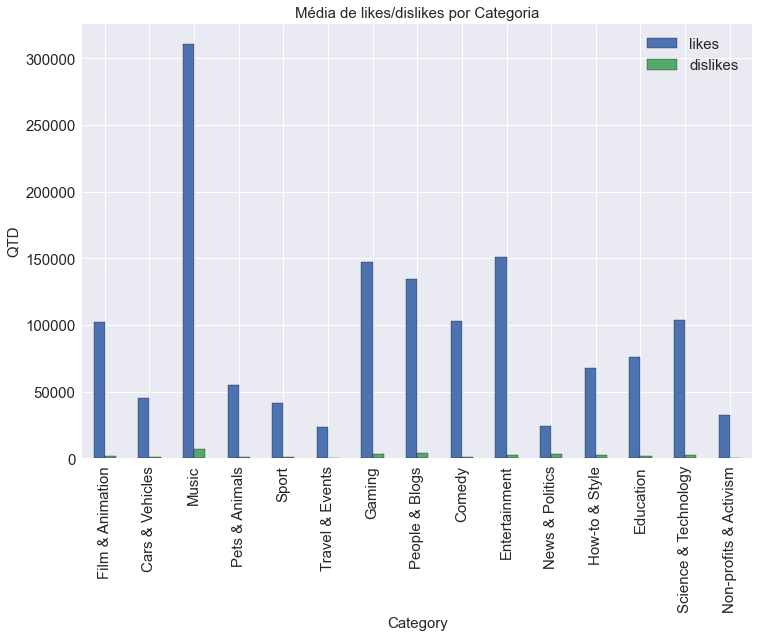

In [12]:
likes_dislikes.plot(kind='bar', title="Média de likes/dislikes por Categoria", xlabel="Category", ylabel="QTD", edgecolor='k')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

## 4. Correlação entre Views e Likes

In [13]:
usa_views_likes = df_usa[['view_count', 'likes']]
usa_views_likes = usa_views_likes.drop(usa_views_likes[usa_views_likes.view_count == 0].index)
usa_views_likes.head()

,view_count,likes
0,1514614,156908
1,2381688,146739
2,2038853,353787
3,496771,23251
4,1123889,45802


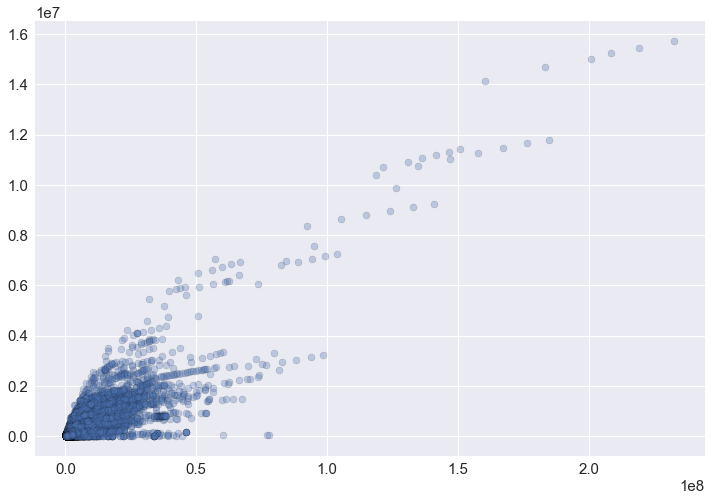

In [14]:
plt.scatter(usa_views_likes['view_count'],usa_views_likes['likes'], alpha=0.3, edgecolor='k')

É possível perceber uma certa correlação entre X e Y a partir do gráfico acima. Valores baixos de visualização possuem, no geral, menor número de likes, enquanto que valores maiores são acompanhados de alto número de curtidas.

Deste modo, uma regressão simples que utiliza método dos quadrados mínimos é traçada sobre os pontos para melhor visualização.

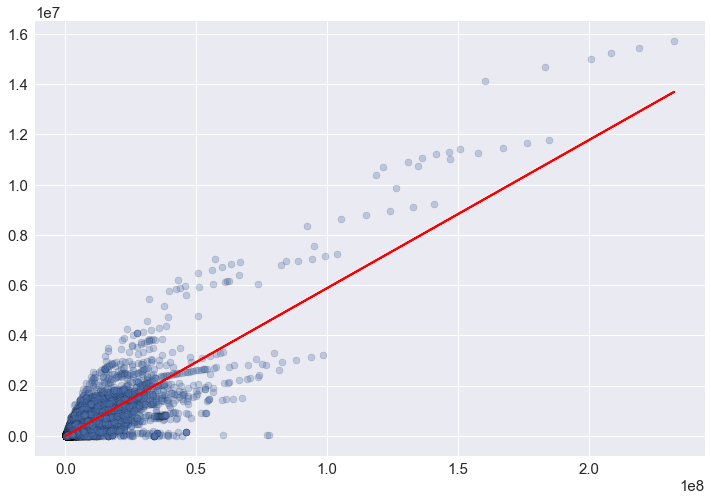

In [15]:
m = np.polyfit(usa_views_likes['view_count'], usa_views_likes['likes'], 1) # utiliza método dos quadrados mínimos
reg = np.poly1d(m)

plt.plot(usa_views_likes['view_count'], reg(usa_views_likes['view_count']), color='red')
plt.scatter(usa_views_likes['view_count'], usa_views_likes['likes'],  alpha=0.3, edgecolor='k')
plt.show()

Por mais que a regressão simples não aparenta ser muito boa, por apresentar grande distancia dos pontos mais extremos, na realidade os dados possuem alta correlação linear, pois o erro se mostra baixo na área inferior da figura, onde a maioria dos pontos está concentrada. O Coeficiente de Pearson calculado abaixo comprova a alta correlação linear. 


In [16]:
usa_views_likes['view_count'].corr(usa_views_likes['likes'], method='pearson')

0.8669005045678463

O resultado próximo de 1 significa que existe uma forte correlação linear positiva nos dados comparados, a medida que o número de visualizações cresce, o número de views também o faz.

Outra maneira de se observar o fenômeno consiste em transformar as escalas originais em uma escala logarítimica, onde é possível perceber de maneira mais nítida a disposição dos pontos no espaço em um comportamento de alta correlação.

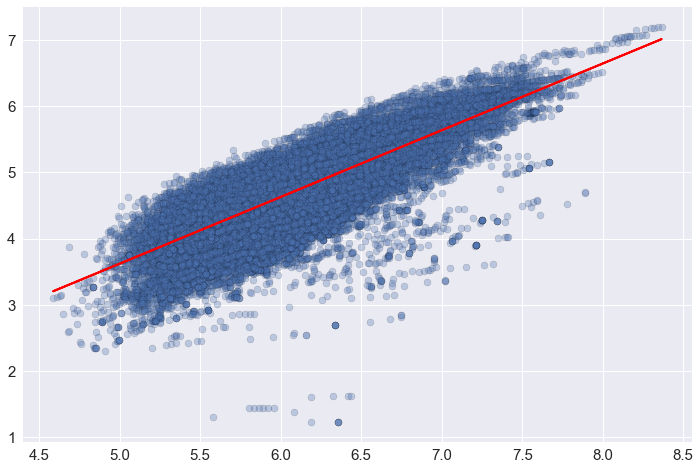

In [17]:
usa_v_l_log = usa_views_likes.copy()
usa_v_l_log = usa_v_l_log[(usa_v_l_log != 0).all(1)]
usa_v_l_log = usa_v_l_log.applymap(lambda x: np.log10(x))


m = np.polyfit(usa_v_l_log['view_count'], usa_v_l_log['likes'], 1) # utiliza método dos quadrados mínimos
reg = np.poly1d(m)

plt.scatter(usa_v_l_log['view_count'], usa_v_l_log['likes'],  alpha=0.3, edgecolor='k')
plt.plot(usa_v_l_log['view_count'], reg(usa_v_l_log['view_count']), color='red')
plt.show()

Observa-se também um alto grau de correlação não-linear, que pode ser evidenciado no Coeficiente de Spearman:

In [18]:
usa_views_likes['view_count'].corr(usa_views_likes['likes'], method='spearman')

0.7780713808444809

Porém, a análise será feita a partir do coeficiente de Pearson, portanto, sobre correlações lineares.

### Intervalo de Confiança

A correlação obtida diz sobre os vídeos em trending nos Estados Unidos, ou seja, uma amostra dos vídeos trending no geral. É necessário saber o quão precisa essa informação é em relação a população como um todo. 

Portanto, um bootstrap pode ser feito, e, então, constrói-se um intervalo de confiança.

In [19]:
def bootstrap_correlacao(amostra, n):
    tamanho = len(amostra)
    valores = np.zeros(n)
    for i in range(n):
        sub_amostra = amostra.sample(tamanho, replace=True)
        valores[i] = sub_amostra['view_count'].corr(sub_amostra['likes'], method='pearson')
    
    return valores

def intervalo_confianca_95(valores_bootstrap):
    return [np.percentile(valores_bootstrap, 2.5), np.percentile(valores_bootstrap, 97.5)]

In [20]:
valores = bootstrap_correlacao(usa_views_likes, 10_000)
intervalo_corr = intervalo_confianca_95(valores)
intervalo_corr

[0.8447023303149139, 0.8855152610544224]

In [21]:
correlacao_pearson_usa = usa_views_likes['view_count'].corr(usa_views_likes['likes'], method='pearson')
print('O valor observado está dentro do intervalo: ', intervalo_corr[0] <= correlacao_pearson_usa <= intervalo_corr[1])

O valor observado está dentro do intervalo:  True


Este resultado implica que qualquer outra amostra dos vídeos trending dos Estados Unidos possui 95% de chance de ter correlação entre views e likes capturada por este intervalo.

Primeiramente, pode-se dizer que a correlação de aproximadamente 0.85 obtida neste dataset é plausível, pois está dentro dos valores esperados.

Ademais, caso a pressuposição de que "usuários do youtube de outros países possuem mesmo comportamento, ou seja, em média dão likes em vídeos com frequência e condições semelhantes aos usuários dos EUA" puder ser feita, o que é razoável, pode-se afirmar, então, que uma amostra qualquer, independente de restrições de país, obtida dos vídeos trending do youtube, possui grandes chances de estar dentro do intervalo aqui computado.

### Teste de Hipótese

No tópico anterior, observou-se que vídeos com mais views possuem mais likes. Esta afirmação parece óbvia, pois vídeos com mais visualizações naturalmente possuem maior oportunidade para receber likes: com 10 visualizações, é possível obter, no máximo, 10 likes; com 100 visualizações, 100 likes podem ser obtidos.

Portanto, pode ser interessante fazer uma análise sobre a proporção de likes sobre views. Assim, um vídeo com 10 visualizações e 5 likes possui a mesma proporção de um vídeo com 1000 visualizações e 500 likes.

Esta análise pode ser feita a partir de um teste de hipótese. Define-se a hipótese nula:

H_0: A proporção entre likes e views em um vídeo é uma variável aleatória.

Em outras palavras, a hipótese nula acima afirma que o número de likes em um vídeo é dado ao acaso. Portanto, a porcentagem de likes em um vídeo com 100 visualizações deve ser próxima à porcentagem de likes em um vídeo com 100.000 visualizações.

In [22]:
media_proporcao_observada = (usa_views_likes['likes'] / usa_views_likes['view_count']).mean()
media_proporcao_observada

0.0569160674897009

Cria-se, então, um modelo onde o número de likes em um vídeo é um valor aleatório uniformemente distribuido entre `[0, numero_views_video]`.  
  

Como o número de likes `l` possui distribuiçao uniforme, pode-se dizer que é gerado por uma V.A `L` ~ Uniforme(0, views).  
  
A proporção, portanto, pode ser descrita como uma V.A P = L / views.

In [23]:
modelo_proporcao_aleatoria = usa_views_likes.copy()
novos_likes = [np.random.randint(0, x) for x in modelo_proporcao_aleatoria['view_count']]
modelo_proporcao_aleatoria['likes'] = novos_likes

modelo_proporcao_aleatoria.head()

,view_count,likes
0,1514614,1255781
1,2381688,2252534
2,2038853,825798
3,496771,194705
4,1123889,971059


In [24]:
usa_views_likes.head()

,view_count,likes
0,1514614,156908
1,2381688,146739
2,2038853,353787
3,496771,23251
4,1123889,45802


In [25]:
np.allclose(modelo_proporcao_aleatoria, usa_views_likes, atol=1_000_000, rtol=0) # Alta tolerância

False

E é realizado o bootstrap da proporção média entre views e likes.

In [26]:
def bootstrap_proporcao_media(amostra, n):
    tamanho = len(amostra)
    valores = np.zeros(n)
    for i in range(n):
        sub_amostra = amostra.sample(tamanho, replace=True)
        valores[i] = (sub_amostra['likes'] / sub_amostra['view_count']).mean()
    
    return valores

In [27]:
valores = bootstrap_proporcao_media(modelo_proporcao_aleatoria, 10_000)
intervalo_prop = intervalo_confianca_95(valores)
intervalo_prop

[0.5012235156099651, 0.5063523437810635]

In [28]:
print('O valor observado está dentro do intervalo: ', intervalo_prop[0] <= correlacao_pearson_usa <= intervalo_prop[1])

O valor observado está dentro do intervalo:  False


Ou seja, caso o modelo aleatorio fosse repopulado e o experimento - cálculo da proporção média - fosse realizado novamente, com 95% de chance o valor obtido estará contido no intervalo acima. Como a proporção média obtida no dataset original está fora dos limites estipulados para o modelo nulo, conclui-se que é improvável que a proporção seja dada por uma V.A, portanto rejeita-se a hipóte-se nula. 

## 5. Tópicos mais abordados

In [29]:
# Função que retorna um dataframe com as quantidades
# de cada categoria, desde que esta seja > 1500

def count_categories(df):
    dx = df['categoryId'].value_counts()
    dx = pd.DataFrame.from_dict(dx)
    dx.columns = ['count']
    dx = dx[dx['count'] > 1500]
    return dx

In [30]:
# Conta as categorias para cada país
filtered_cat = []
for i in dfs:
    filtered_cat.append(count_categories(i))

In [31]:
# Cria um dataframe com as categorias mais populares por país
# e suas respectivas quantidades

x_all = pd.concat(filtered_cat,axis=1)
x_all.columns = ['BR','CA','DE','FR','GB','IN','JP','KR','MX','US']
x_all = x_all[x_all.notna().sum(axis=1) > 5]
x_all.index = ['Music','Sports','Gaming','People & Blogs','Comedy','Entertainment', 'News & Politics', 'How-to & Style', 'Education']
x_all

,BR,CA,DE,FR,GB,IN,JP,KR,MX,US
Music,12641.0,7677.0,9769.0,11614.0,6961.0,8228.0,5983.0,5114.0,12987.0,10205.0
Sports,7473.0,6134.0,5919.0,5650.0,9033.0,1840.0,3542.0,3587.0,4648.0,5599.0
Gaming,3419.0,5948.0,2956.0,2822.0,5689.0,NaN,2919.0,1504.0,5096.0,6069.0
People & Blogs,6112.0,4273.0,5365.0,2390.0,4145.0,4683.0,7455.0,6112.0,6494.0,4143.0
Comedy,2357.0,3383.0,NaN,5144.0,2646.0,3828.0,2741.0,2925.0,2085.0,2844.0
Entertainment,12627.0,10452.0,13239.0,11690.0,11876.0,18709.0,17465.0,15898.0,11074.0,9890.0
News & Politics,NaN,2005.0,1975.0,1709.0,1509.0,1973.0,NaN,2969.0,1682.0,1985.0
How-to & Style,NaN,2297.0,2236.0,1847.0,NaN,1788.0,2539.0,1698.0,1863.0,2056.0
Education,NaN,2373.0,1968.0,1878.0,2003.0,1984.0,NaN,NaN,NaN,1994.0


<AxesSubplot:>

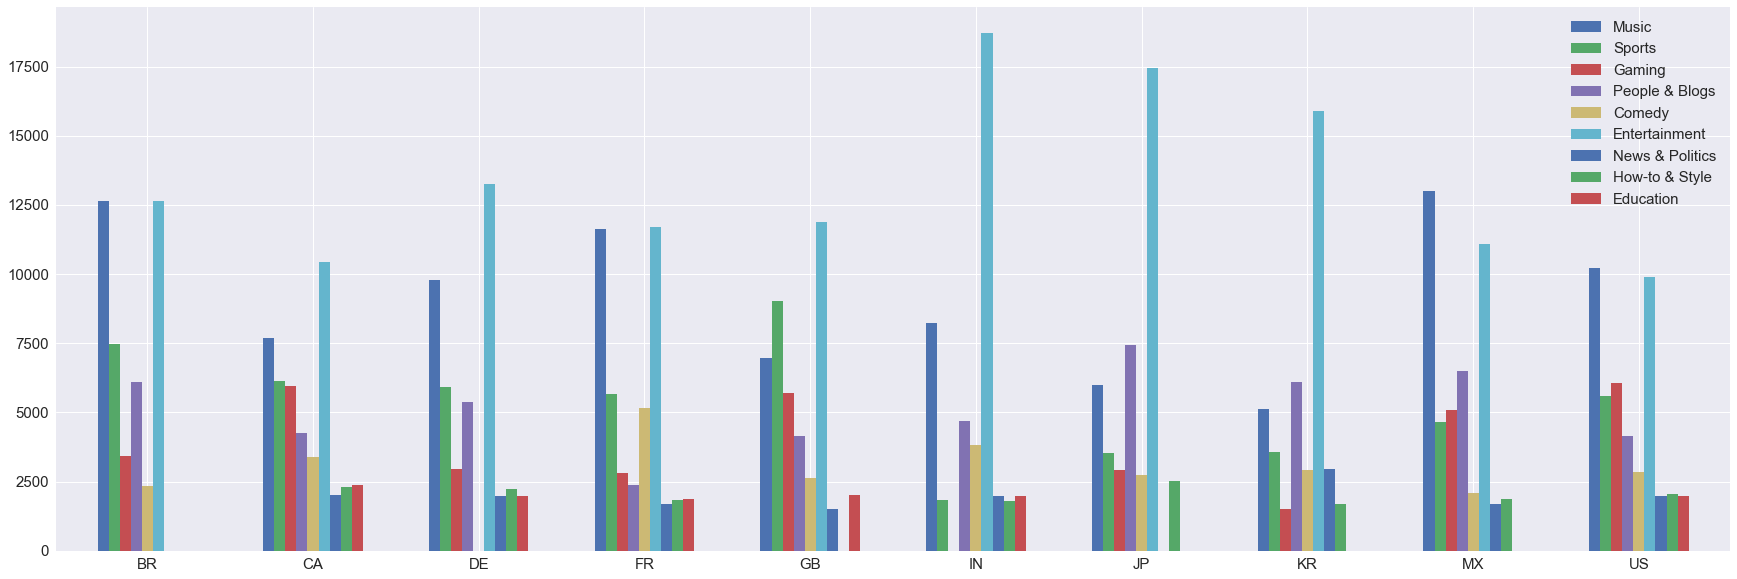

In [32]:
x_all.transpose().plot.bar(figsize=(30,10),rot=0,width=0.6)

Pelo gráfico acima, é possível inferir que, de uma maneira geral, os tipos de conteúdo mais consumidos de cada país se concentram nas questões de relaxamento e diversão, o que faz sentido, visto que os dados se referem a um período de quarentena e, para muitas pessoas, assistir vídeos era uma das formas de passar o tempo livre em casa.

A categoria entretenimento esteve no top 2 em todos os países. O segundo lugar variou um pouco entre os países, mas todos se permaneceram nessa área de descontração. 

Nos países asiáticos, a categoria de entretenimento foi a vencedora com muita vantagem. Uma análise rápida das tags mais frequentes mostrou que, na Índia, isso se deve, principalmente, ao sucesso de uma sitcom hindi chamada Taarak Mehta Ka Ooltah Chashmah. Os conteúdos mais acessados no país foram - com muita margem sobre as demais - teorias, memes e melhores momentos da série. No Japão, os animes foram os tópicos mais presentes, enquanto na Coréia do Sul, foram vídeos de fãs de K-pop, com teorias e curiosidades.

Países americanos tiveram forte presença de música. Lives, músicas e álbuns novos foram os mais presentes nas tags dessa categoria. Além de música, o tópico de esportes também foi marcante. No Brasil, o futebol foi o mais presente nas tags. Nos EUA, basquete e futebol americano foram os vencedores, enquanto no Canadá, o pódio foi composto por boliche e ping-pong. Já no México, o futebol ocupou o topo.

Nos países europeus, também obtivemos resultados similares aos americanos. Os esportes mais frequentes na Grã-Bretanha foram luta-livre, futebol e boliche, enquanto na Alemanha e na França, o futebol foi o vencedor.


## 6. Assuntos do momento

Faremos agora uma análise dos tópicos mais abordados em alguns países, filtrando-os em intervalos de tempo e tentando relacionar com os assuntos mais comentados em outras redes sociais nesses intervalos.

In [33]:
df_br = pd.read_csv('BR_youtube_trending_data.csv', sep=',')

In [34]:
#f_br.groupby(by = ['categoryId']).count()
df_br = df_br.drop(columns=['video_id','channelId','thumbnail_link'])
df_br.sort_values(by=['trending_date'],inplace=True)
#df_br.head()

In [35]:
font = TTFont('DroidSansMono.ttf')
tables = font['cmap'].tables

#funcao que checa se a fonte utilizada possui os caracteres da palavra a ser impressa
def has_glyphs(word):
    global tables
    for glyph in word:
        for table in tables:
            if ord(glyph) not in table.cmap.keys():
                return False
    return True

stopwords = set(STOPWORDS) 
stopwords.add("de")
stopwords.add("official")
stopwords.add("video")
stopwords.add("music")
stopwords.add("clipe")
stopwords.add("oficial")
stopwords.add("videoclipe")
#funcao que gera uma nuvem de palavras de uma série fornecida
def tag_words(db,mfs=10):
    comment_words = '' 
    global stopwords

    for val in db: 
        val = str(val) 

        tokens = val.split() 
        for i in range(len(tokens)): 
            low = tokens[i].lower()
            if low!='[none]' and has_glyphs(low):
                comment_words+=low+' '

    wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = mfs).generate(comment_words) 



    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

A núvem de palavras à seguir contém as palavras mais frequentes em títulos dos vídeos trending no Brasil no período inteiro analisado (08/20 - 02/21)

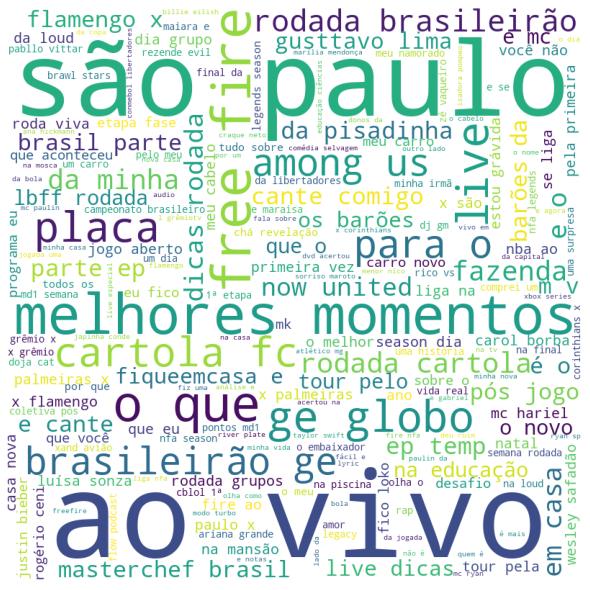

In [36]:
tag_words(df_br['title'])

A núvem evidencia que os títulos mais comuns são relacionados à música, a esportes e a jogos. À seguir, repetiremos o processo, substituindo as palavras dos títulos pelas tags.

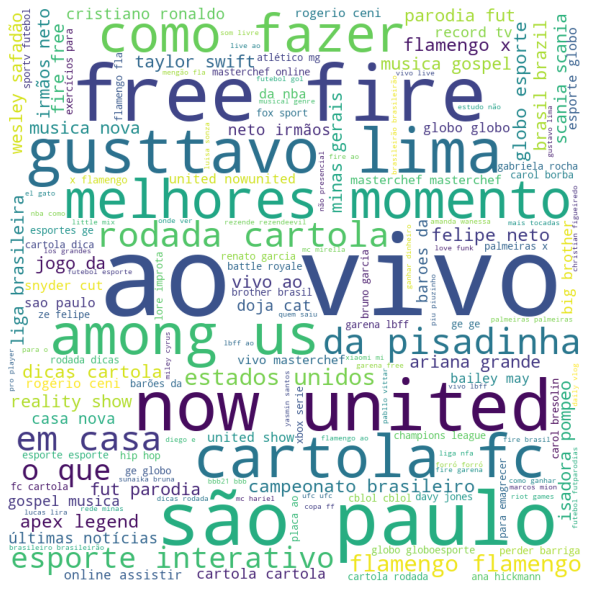

In [37]:
tag_words(df_br['tags'],10)

As núvens mostram que as palavras mais frequentes nos trending vídeos do youtube tanto brasileiro quanto estadunidense são relacionadas a música, a jogos e criadores de conteúdo (por exemplo, vlogs, blogs, lives). Agora, analisaremos as tags mais frequentes em alguns meses no Brasil.

In [38]:
d8br = df_br
d8br = d8br[d8br['trending_date'].str.contains('2020-08')]

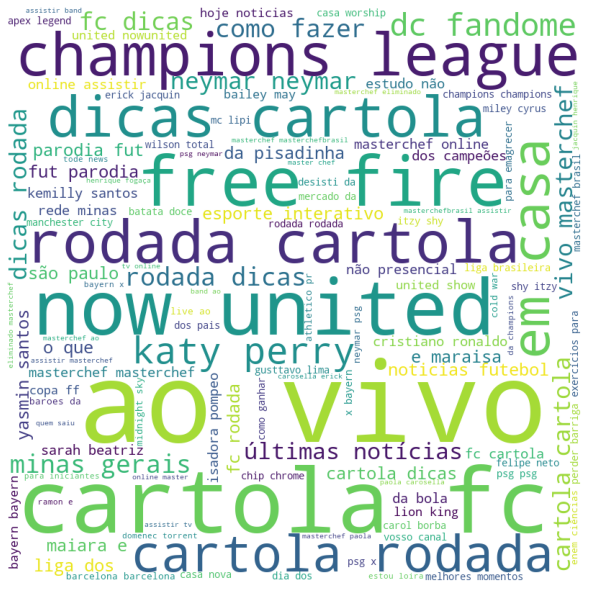

In [39]:
#tags agosto br
tag_words(d8br['tags'])

In [40]:
d9br = df_br
d9br = d9br[d9br['trending_date'].str.contains('2020-09')]


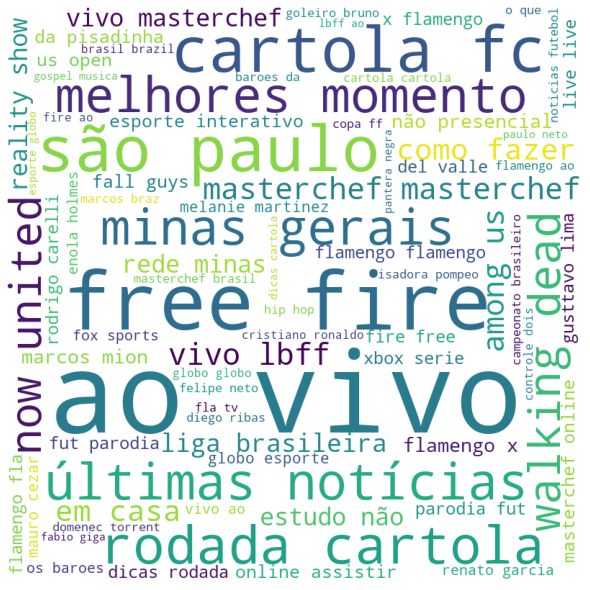

In [41]:
#tags setembro br
tag_words(d9br['tags'],12)

In [42]:
d1br=df_br
d1br = d1br[d1br['trending_date'].str.contains('2021-01')]


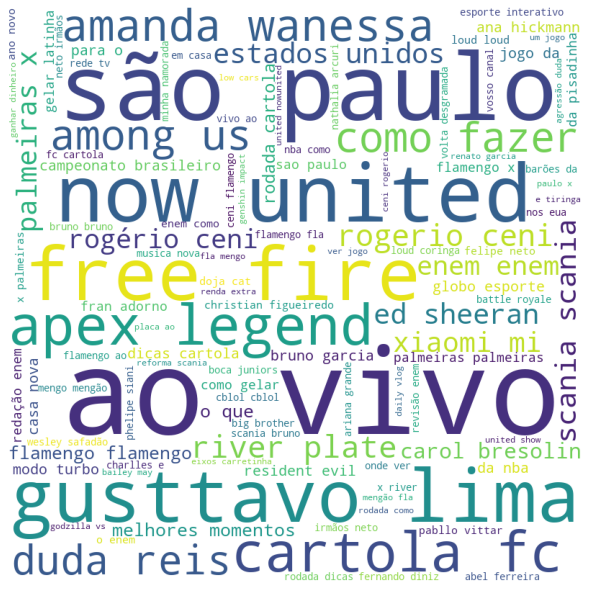

In [43]:
#tags janeiro br
tag_words(d1br['tags'],12)

As núvens mostram que certos tópicos relevantes em cada mês são bastante frequentes nas tags do youtube, por exemplo, lives de personalidades específicas, partidas específicas de jogos de esportes ou virtuais, novas músicas ou álbuns de bandas. Agora, restringiremos mais a busca, de forma a gerar uma núvem com as tags mais presentes em um dia específico.

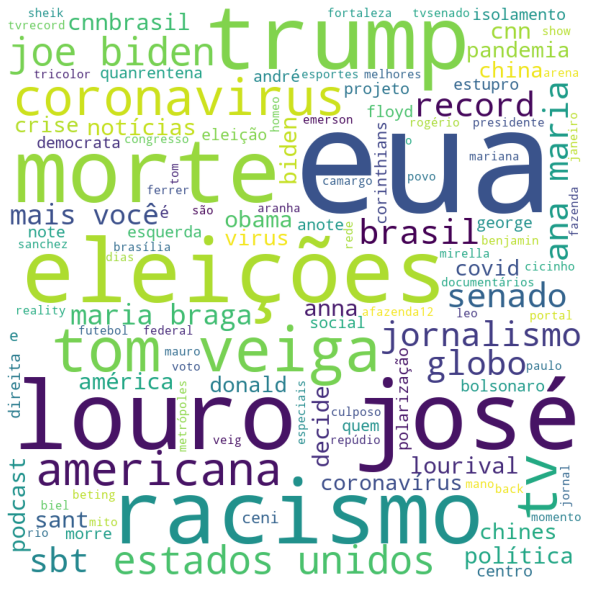

In [44]:
#tags noticias br 5/11
dx = df_br[df_br['trending_date'].str.contains('2020-11-05')]
dx = dx[dx['categoryId'] == 25]
tag_words(dx['tags'],10)

Para esse dia específico (05/11/20), as tags mais frequentes eram sobre a morte do ator Tom Veiga, assim como a tensão na eleição americana, que realmente foram tópicos muito discutidos nesse dia. Não é uma tarefa fácil analisar se esse comportamento se mantém diariamente, mas não é estranho de se pensar que os assuntos mais relevantes do momento componham uma parte significativa das tendências do youtube, e as núvens de palavras acima contribuem para esse argumento.

## 7. Previsões


In [45]:
dfs_prev = []
for i in range(len(dfs)):
    dfs_prev.append(dfs[i][['categoryId','trending_date']])
dfs_prev = pd.concat(dfs_prev)

In [46]:
meses = []
mapping = {1:'Film & Animation',2:'Cars & Vehicles',10:'Music',15:'Pets & Animals',17:'Sport',19:'Travel & Events',20:'Gaming',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'How-to & Style',27:'Education',28:'Science & Technology',29:'Non-profits & Activism'}
for i in range(8,13):
    meses.append(dfs_prev[dfs_prev['trending_date'].str.contains(f'2020-{i:>02}')]['categoryId'].replace(mapping).value_counts().sort_index())
for i in range(1,3):
    meses.append(dfs_prev[dfs_prev['trending_date'].str.contains(f'2021-{i:>02}')]['categoryId'].replace(mapping).value_counts().sort_index())

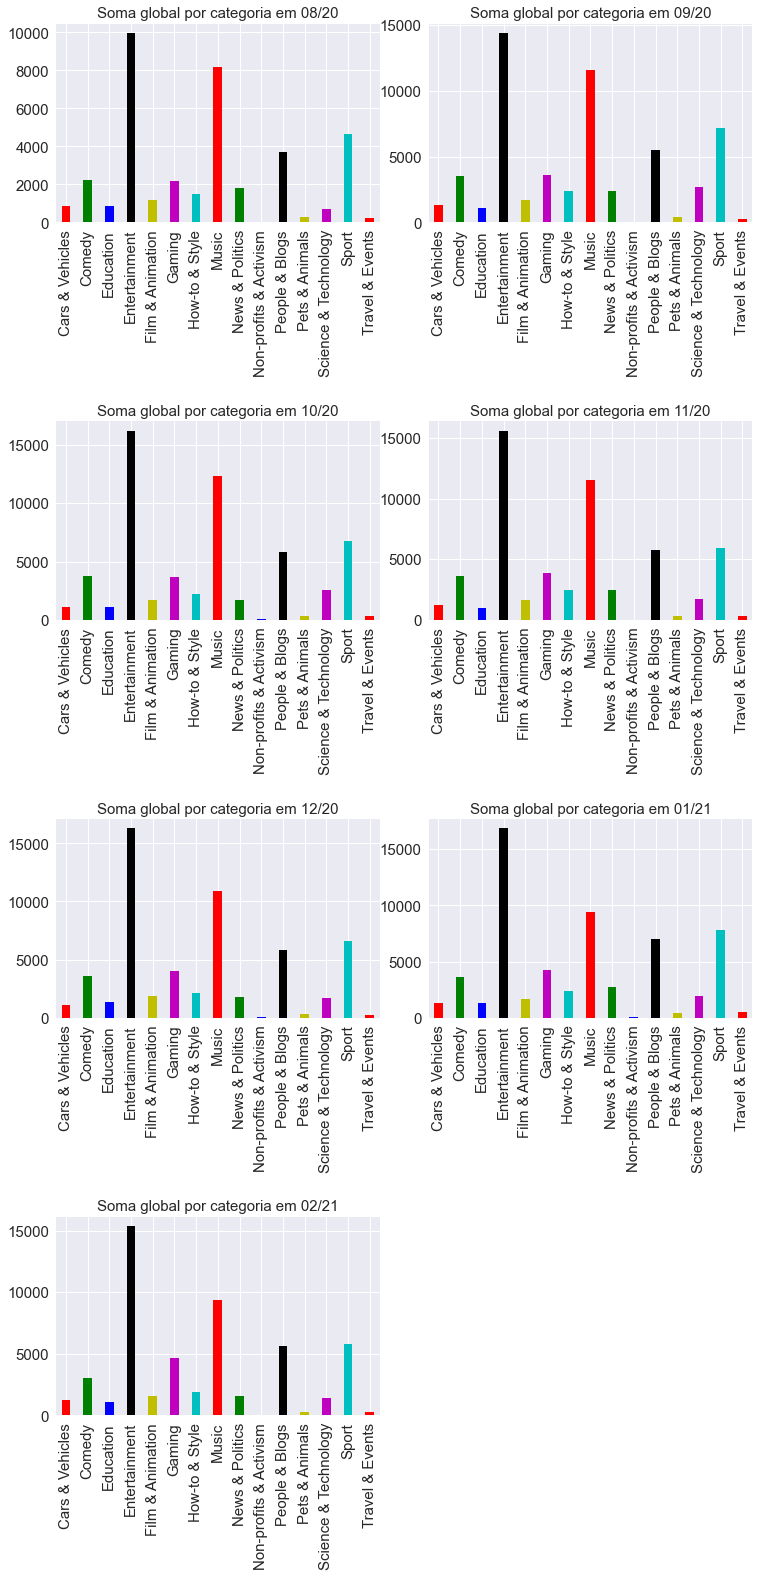

In [47]:
fig,ax = plt.subplots(4,2,figsize=(10.5,20))
fig.tight_layout()
fig.delaxes(ax[3][1])
k=0
l=0
j=0
titles = ['08/20','09/20','10/20','11/20','12/20','01/21','02/21']
for i in meses:
    i.plot(kind='bar',color=list('rgbkymc'),ax=ax[l][k],width=0.4)
    ax[l][k].set_title('Soma global por categoria em '+titles[j])
    k=(k+1)%2
    if k == 0:
        l+=1
    j+=1

plt.subplots_adjust(hspace=1)
plt.show()

Como os dados foram coletados durante a pandemia da COVID-19 e, durante a confecção desse trabalho, ainda nos encontramos nesse quadro, é plausível de se esperar que, nos próximos meses, o comportamento de tópicos trending mundialmente seja semelhante ao dos anteriores.

Os gráficos acima discriminam o número de vídeos por categoria que ficaram trending mundialmente em cada mês entre Agosto de 2020 e Fevereiro de 2021. Apesar de não estarem na mesma escala, eles explicitam, até visualmente, um comportamento bem constante das categorias mais frequentes nas tendências do youtube. 

Supondo que o comportamento observado nos últimos 7 meses se mantenha, espera-se que os tópicos de música, entretenimento, esportes e blogues permaneçam como os mais relevantes nos próximos meses.